In [7]:
from pathlib import Path

ML_ROOT = Path("/Users/manour/Desktop/M2BI/projet_long/KOPIS2-Delimitation-automatique-de-domaines-structuraux-de-prot-via-UNet/kopis_data/ml")

UNET_ROOT = ML_ROOT / "unet"
print("Sous-dossiers dans unet/:")
for p in UNET_ROOT.iterdir():
    print(" -", p.name)

DOMAINS_ROOT = UNET_ROOT / "domains"
print("\nExemples de fichiers dans domains/:")
for i, p in enumerate(DOMAINS_ROOT.iterdir()):
    print(" -", p.name)
    if i >= 10:
        break
    
CONTACTS_ROOT = UNET_ROOT / "contacts"
print("\nExemples de fichiers dans contacts/:")
for i, p in enumerate(CONTACTS_ROOT.iterdir()):
    print(" -", p.name)
    if i >= 10:
        break

Sous-dossiers dans unet/:
 - domains
 - contacts
 - labels

Exemples de fichiers dans domains/:
 - G9FCX2.npy
 - O26249.npy
 - A0A0H2UQ81.npy
 - A4XEN7.npy
 - B3VI58.npy
 - A0A173M094.npy
 - B9RWR5.npy
 - A0A1Y1BWQ0.npy
 - A9FFA1.npy
 - A7SLZ2.npy
 - A0R6D0.npy

Exemples de fichiers dans contacts/:
 - G9FCX2.npy
 - O26249.npy
 - A0A0H2UQ81.npy
 - A4XEN7.npy
 - B3VI58.npy
 - A0A173M094.npy
 - B9RWR5.npy
 - A0A1Y1BWQ0.npy
 - A9FFA1.npy
 - A7SLZ2.npy
 - A0R6D0.npy


In [8]:
import numpy as np
from pathlib import Path

ML_ROOT = Path("/Users/manour/Desktop/M2BI/projet_long/KOPIS2-Delimitation-automatique-de-domaines-structuraux-de-prot-via-UNet/kopis_data/ml")
UNET_ROOT = ML_ROOT / "unet"

uniprot_id = "A0A0H2UQ81"  # remplace par un ID que tu vois dans la liste

contacts = np.load(UNET_ROOT / "contacts" / f"{uniprot_id}.npy")
domain_map = np.load(UNET_ROOT / "domains" / f"{uniprot_id}.npy")

print("contacts:", contacts.shape, contacts.dtype, contacts.min(), contacts.max())
print("domain_map:", domain_map.shape, domain_map.dtype, domain_map.min(), domain_map.max())

contacts: (155, 155) float32 0.0 0.98201
domain_map: (155, 155) uint8 0 1


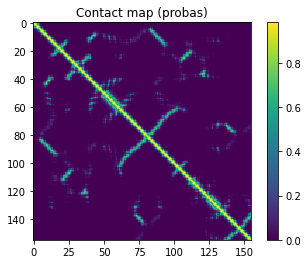

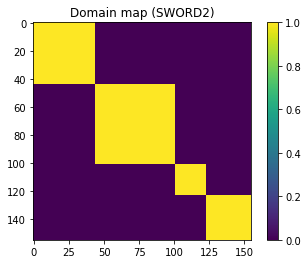

In [9]:
import matplotlib.pyplot as plt

plt.imshow(contacts, interpolation="nearest")
plt.title("Contact map (probas)")
plt.colorbar()
plt.show()

plt.imshow(domain_map, interpolation="nearest")
plt.title("Domain map (SWORD2)")
plt.colorbar()
plt.show()

La première image correspond à la **carte de contacts résidu–résidu** d’une protéine.  
Elle est obtenue à partir de `file_proba_contact.mat` (sortie de SWORD2 sur le modèle AlphaFold) et représente, pour chaque paire de résidus (i, j), la **probabilité de contact** : la diagonale est très brillante (contact i–i), et les bandes autour de la diagonale correspondent à des segments de structure en contact.

La seconde image montre la **matrice de domaines** (`domain_map`).  
Elle est construite à partir de `Peeling.log` : pour chaque domaine [start, end] choisi par SWORD2 (dernière ligne, CI maximal), on met 1 pour toutes les paires de résidus à l’intérieur du domaine, et 0 sinon. On obtient donc des **blocs carrés** jaunes le long de la diagonale, chacun correspondant à un domaine structural.
